# Plotting with folium

__What is Folium?__

It builds on the data wrangling and a Python wrapper for leaflet.js. It makes it easy to visualize data in Python with minimal instructions.

Folium expands on the data wrangling properties utilized in Python language and the mapping characteristics of the Leaflet.js library. Folium enables us to make an intuitive map and are is visualized in a Leaflet map after manipulating data in Python. Folium results are intuitive which makes this library helpful for dashboard building and easier to work with.

Let's see the implementation of both GeoPandas and Folium:

In [1]:
# Importing Libraries
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt

We will be using different icons to differentiate the types of Volcanoes using Folium.
But before we start, we can see a few different tiles to choose from folium.

In [2]:
# OpenStreetMap
map = folium.Map(location = [49.04545581982211, 2.0126577908204326], tiles='http://capsule.local:8080/styles/klokantech-basic/{z}/{x}/{y}.png', attr="<a>Capsule Offline Map</a>", zoom_start = 15)
folium.Marker(
    location=[49.04545581982211, 2.0126577908204326],
    popup="Maison",
    icon=folium.Icon(icon="cloud"),
).add_to(map)
map

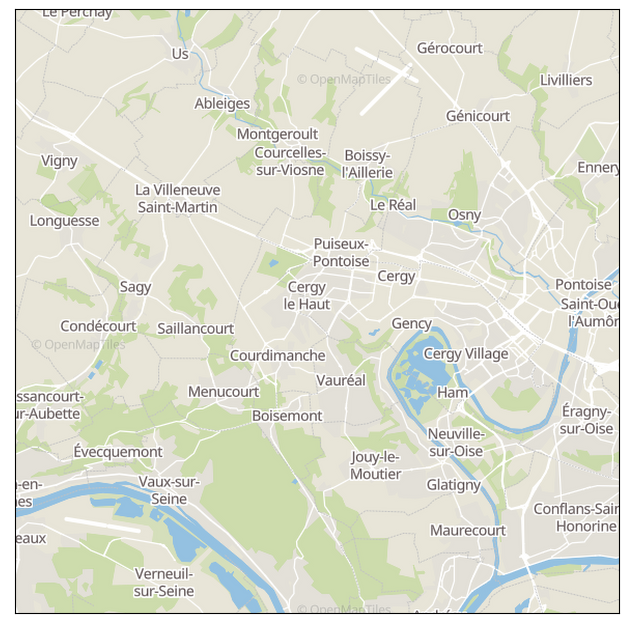

In [19]:
import os
import shutil
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from typing import List
import tilemapbase
import matplotlib.pyplot as plt
import yaml
import sys

path_to_conf = os.path.join("/etc/capsule/timelapse_trip/config.yaml")
# If the default configuration is not install, then configure w/ the default one
if not os.path.exists(path_to_conf):
    sys.exit("Configuration file %s does not exists. Please reinstall the app" % path_to_conf)
# load configuration
with open(path_to_conf, "r") as file:
    conf = yaml.load(file, Loader=yaml.FullLoader)

t = tilemapbase.tiles.Tiles(conf["map_generation"]["url"], "osm", headers={"User-Agent":"TileMapBase"})
degree_range = 0.01
lat = 49.044945226246284
lon = 2.012601132963608
extent = tilemapbase.Extent.from_lonlat(
    lon - degree_range, lon + degree_range, lat - degree_range, lat + degree_range)
extent = extent.to_aspect(1.0)
plotter = tilemapbase.Plotter(extent, t, width=500)
plotter.as_one_image(True).save("save.png")


fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plotter.plot(ax, t)

We can use other tiles for the visualization, these are just a few examples.

### Markers
Now, let's look at different volcanoes on the map using different Markers to represent the volcanoes.

In [21]:
#use terrain map layer to actually see volcano terrain
map = folium.Map(location = [4,10], tiles = "Stamen Terrain", zoom_start = 3)

In [22]:
# insert multiple markers, iterate through list
# add a different color marker associated with type of volcano

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

i = 0
for coordinates in geo_df_list:
    #assign a color marker for the type of volcano, Strato being the most common
    if geo_df.Type[i] == "Stratovolcano":
        type_color = "green"
    elif geo_df.Type[i] == "Complex volcano":
        type_color = "blue"
    elif geo_df.Type[i] == "Shield volcano":
        type_color = "orange"
    elif geo_df.Type[i] == "Lava dome":
        type_color = "pink"
    else:
        type_color = "purple"


    #now place the markers with the popup labels and data
    map.add_child(folium.Marker(location = coordinates,
                            popup =
                            "Year: " + str(geo_df.Year[i]) + '<br>' +
                            "Name: " + str(geo_df.Name[i]) + '<br>' +
                            "Country: " + str(geo_df.Country[i]) + '<br>'
                            "Type: " + str(geo_df.Type[i]) + '<br>'
                            "Coordinates: " + str(geo_df_list[i]),
                            icon = folium.Icon(color = "%s" % type_color)))
    i = i + 1

In [23]:
map

### Heatmaps

Folium is well known for it's heatmap which create a heatmap layer. To plot a heat map in folium, one needs a list of Latitude, Longitude.

In [24]:
# In this example, with the hep of heat maps, we are able to perceive the density of volcanoes
# which is more in some part of the world compared to others.

from folium import plugins

map = folium.Map(location = [15,30], tiles='Cartodb dark_matter', zoom_start = 2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map